<a href="https://colab.research.google.com/github/joymuli10/Advertising-Prediction-R/blob/main/R_Advertisement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a). Specifying the question



> Identify which individuals are most likely to click on the advertisements.



## b). Defining the metric for success

## c). The context



> The dataset to be used for the study was provided by the client to identify which individuals are most likely to click on an ad. The client is an entrepreneur who owns an online cryptography course and would want to advertise it on her blog. 



## d). Experimental Design



> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

1. Load data and preview data
2. Data Cleaning
3. Exploratory Analysis
4. Recommendations



## e). Appropriateness of the Data



> The data to be used was provided by the client from previous ads that she ran advertising a related course. It has 1000 rows and 10 columns. The columns are daily_time_spent_on_site, age, area_income, daily_internet_usage, ad_topic_line, city, male, country, timestamp, clicked_on_ad.



# Reading the Data

In [1]:
# Installing the needed packages
install.packages("data.table") # install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") # install packages to work with data frame - extends into visualization
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
#Reading the dataset
advertising <- read_csv(file = '/content/advertising.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




In [3]:
# Previewing the dataset
advertising

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0


## Checking the data

In [4]:
# Previewing the head of the dataset
head(advertising)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [5]:
# Checking the bottom of the tail
tail(advertising)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [6]:
# Checking for the number of rows and columns
dim(advertising)

[1] 1000   10



> There are 1000 rows and 10 columns



In [7]:
class(advertising)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

# Data Cleaning

In [8]:
# Checking the structure of the dataset

str(advertising)

tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Daily Time Spent on Site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ Age                     : num [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num [1:1000] 256 194 236 246 226 ...
 $ Ad Topic Line           : chr [1:1000] "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr [1:1000] "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : num [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr [1:1000] "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct[1:1000], format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : num [1:1000] 0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   `

In [9]:
# # Identifying total missing values in each column by using the function colSums()

colSums(is.na(advertising))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0



> There are no missing values in our dataset



In [10]:
# Identify numeric columns
num_cols <- unlist(lapply(advertising, is.numeric))
num_cols

Daily Time Spent on Site                      Age              Area Income 
                    TRUE                     TRUE                     TRUE 
    Daily Internet Usage            Ad Topic Line                     City 
                    TRUE                    FALSE                    FALSE 
                    Male                  Country                Timestamp 
                    TRUE                    FALSE                    FALSE 
           Clicked on Ad 
                    TRUE

In [11]:
 # Evaluating if there are any outliers in the numeric class
#Subset numeric columns of data
data_num <- advertising[ ,num_cols]                        
data_num 

# They are; daily time spent on site, age, area income, daily internet usage, male, click on ad

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0
88.91,33,53852.85,208.36,0,0
66.00,48,24593.33,131.76,1,1
74.53,30,68862.00,221.51,1,0


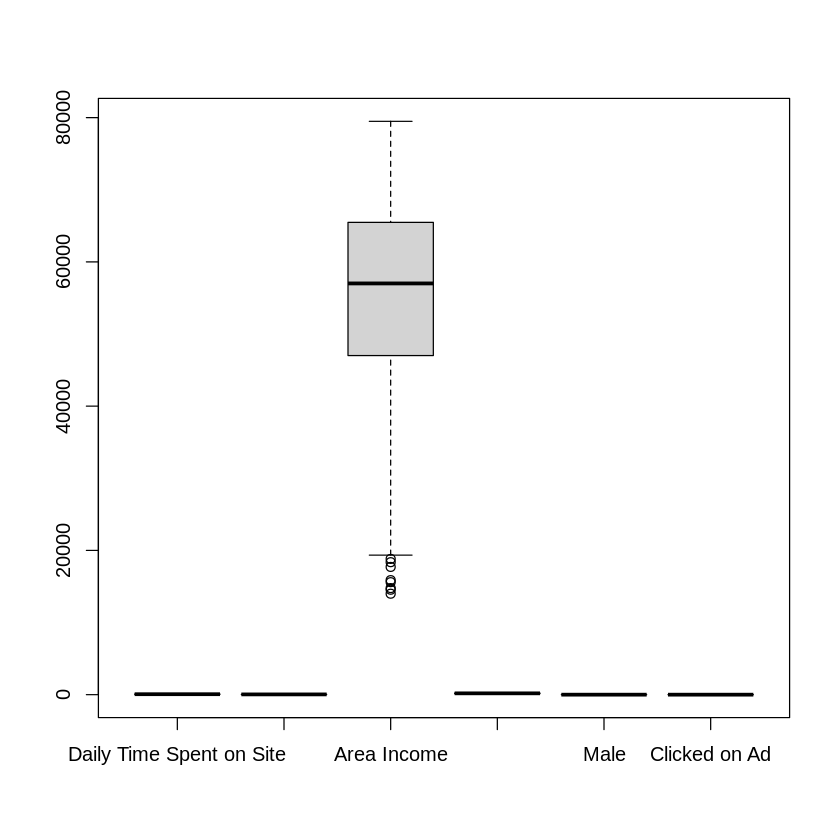

In [12]:
# Plotting the boxplot of the numeric columns
boxplot(data_num)



> There were outliers only on the area income column. Now to check the values



In [13]:
# There were only outliers in the Area Income column
# Checking the number of outliers
boxplot.stats(advertising$`Area Income`)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [14]:
# Checking for dupicated rows
duplicate_rows <- advertising[duplicated(advertising),]
duplicate_rows

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>




> There were no duplicated rows in the dataset



In [15]:
# Making all the columns lower cased for uniformity
names(advertising) <- str_replace_all(names(advertising), c(" " = "_"))
names(advertising) <- tolower(names(advertising))

# Exploratory Analysis

## Univariate Analysis



> **Measure of Central Tendency**





In [16]:
# Unfotunately, R does not have a standard in-built function to calculate mode so we have to build one
# We create the mode function that will perform our mode operation for us
# ---
# 
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# I combined the mean median and the mode
attach(advertising)
mean(area_income); median(area_income);getmode(area_income)


[1] 55000

[1] 57012.3

[1] 61833.9

In [17]:
# I combined the mean median and the mode
mean(age); median(age);getmode(age)

[1] 36.009

[1] 35

[1] 31

In [18]:
# I combined the mean median and the mode
mean(daily_time_spent_on_site); median(daily_time_spent_on_site);getmode(daily_time_spent_on_site)

[1] 65.0002

[1] 68.215

[1] 62.26

In [19]:
# I combined the mean median and the mode
mean(daily_internet_usage); median(daily_internet_usage);getmode(daily_internet_usage)

[1] 180.0001

[1] 183.13

[1] 167.22



> **Measure of Dispersion**



In [20]:
# I combined all on one code
min(daily_time_spent_on_site); max(daily_time_spent_on_site);range(daily_time_spent_on_site); quantile(daily_time_spent_on_site); var(daily_time_spent_on_site);sd(daily_time_spent_on_site) 

[1] 32.6

[1] 91.43

[1] 32.60 91.43

0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300

[1] 251.3371

[1] 15.85361

In [21]:
# Getting the summary
summary(advertising)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 ad_topic_line          city                male         country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   



> **Boxplot**



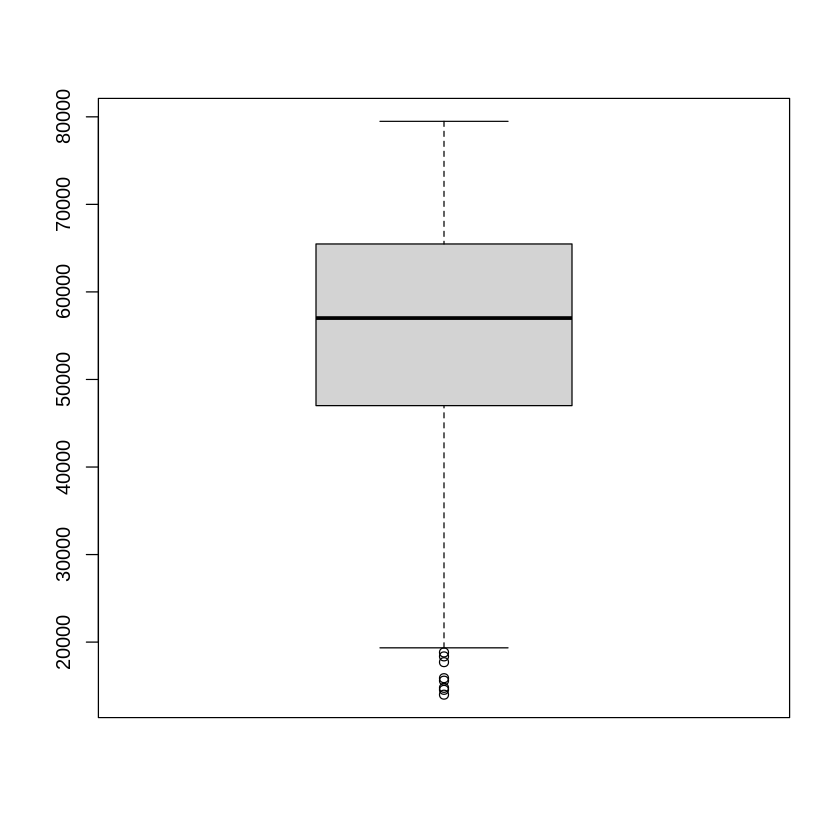

In [22]:
# Checking for the outliers area_income column since it's the only one with outliers
boxplot(advertising$area_income)



> **Frequency Distribution Table**



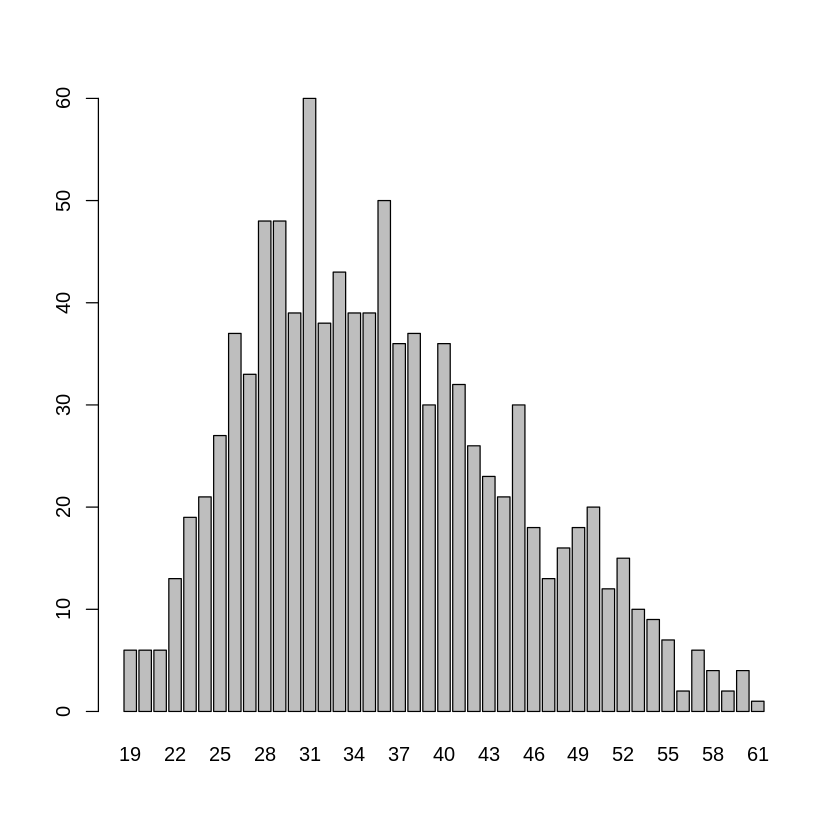

In [23]:
# Fetching the age column
age <- advertising$age

# Applying the table() function will compute the frequency distribution of the age variable
age_frequency <- table(age)

# Then applying the barplot function to produce its bar graph
barplot(age_frequency)



> The highest age for people who clicked on the ads was around 28 to 37 years.





> **Histogram**



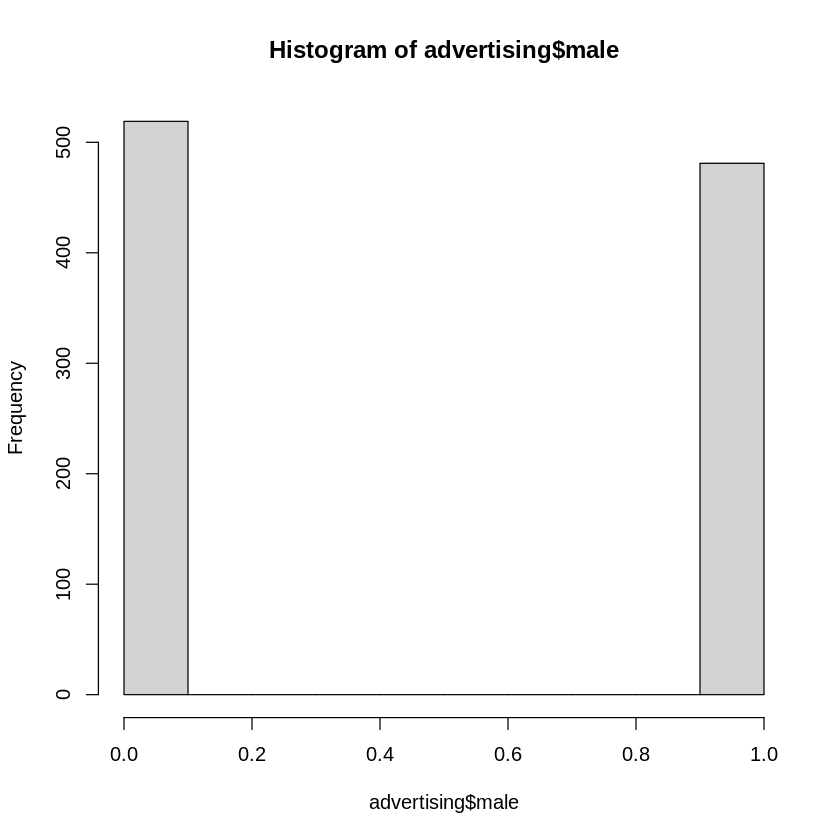

In [24]:
hist(advertising$male)



> There was a slight difference between the number of men and women who clicked on the ads.



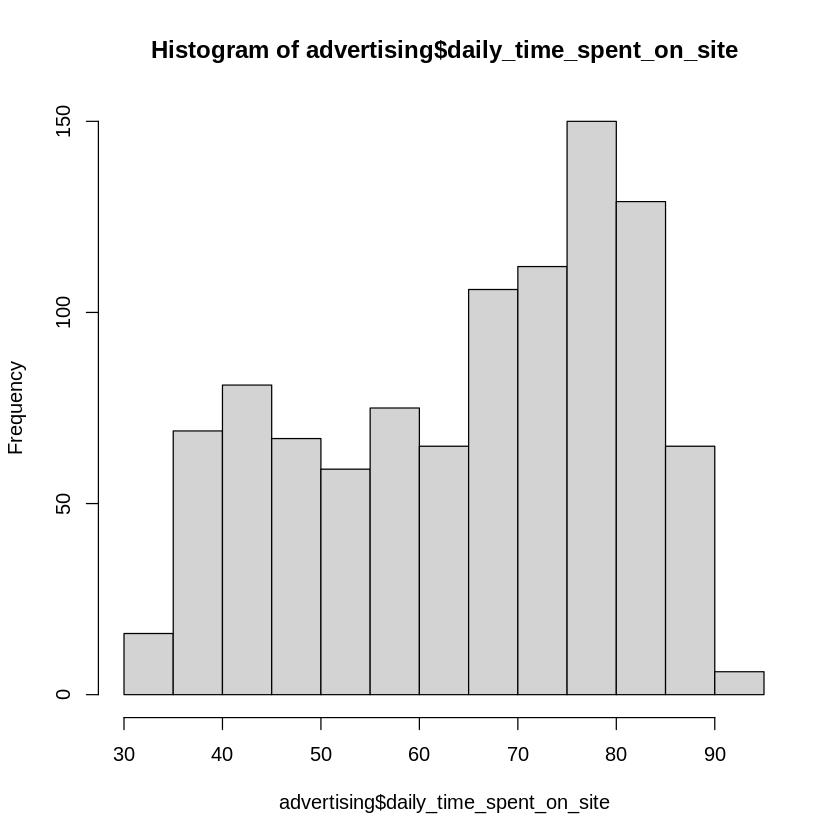

In [25]:
hist(advertising$daily_time_spent_on_site)

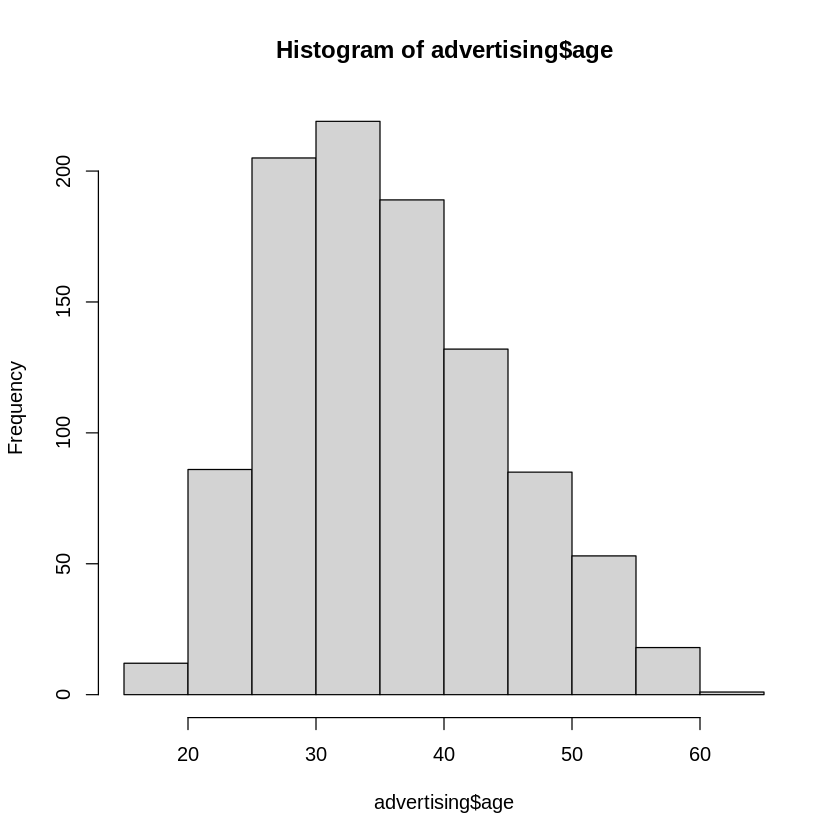

In [26]:
hist(advertising$age)

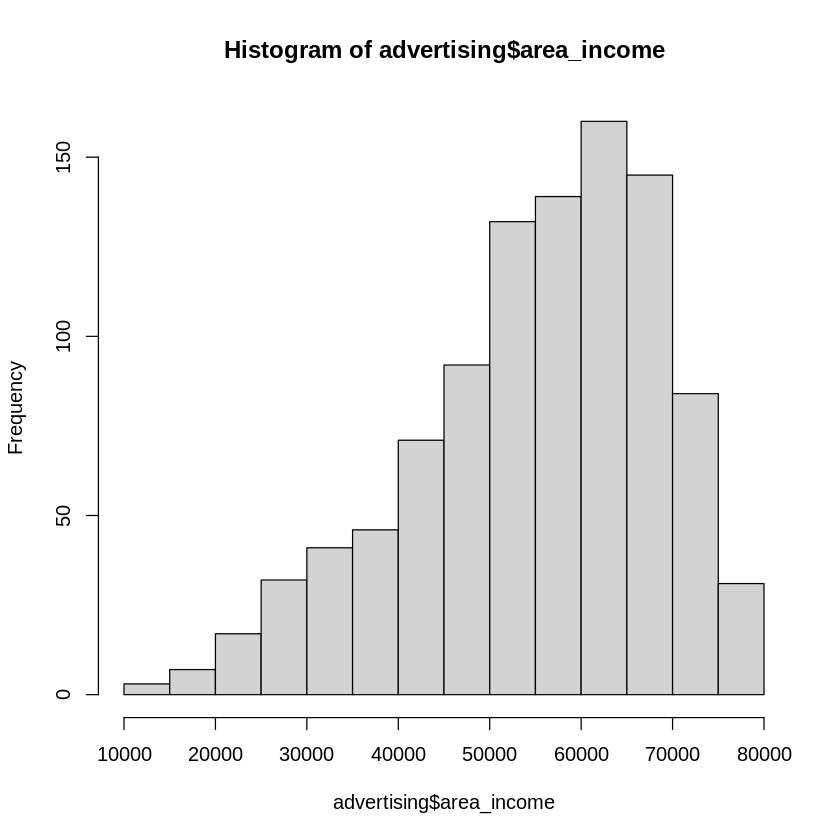

In [27]:
hist(advertising$area_income)



> Most people who clicked on the ads earned more than the mean area income of 55000.



## Bivariate Analysis



> **Covariance**



In [28]:
# Finding the covariance between daily_time_spent_on_site and age
# Assigning a variable to each column
site_time <- advertising$daily_time_spent_on_site
age <- advertising$age
cov(site_time, age)

[1] -46.17415

In [29]:
# Covariance between daily_time_spent_on_site and income
income <- advertising$area_income
cov(site_time, income)

[1] 66130.81



> This indicated a positive linear relationship between area_income and daily_time_spent_on_site.





> **Correlation**



In [30]:
# Correlation between daily_time_spent_on_site and age
cor(site_time, age)

[1] -0.3315133

In [31]:
# Correlation between daily_time_spent_on_site and area_income
cor(site_time, income)

[1] 0.3109544

In [32]:
# Correlation between clicked_on_ad and age
cor(advertising$age, advertising$clicked_on_ad)

[1] 0.4925313

In [33]:
# Correlation between clicked_on_ad and male
cor(advertising$male, advertising$clicked_on_ad)

[1] -0.03802747

In [34]:
# Correlation between clicked_on_ad and area_income
cor(advertising$area_income, advertising$clicked_on_ad)

[1] -0.4762546

In [35]:
# Correlation between clicked_on_ad and daily_internet_usage
clicked <- advertising$clicked_on_ad
net_use <- advertising$daily_internet_usage
cor(advertising$daily_internet_usage, advertising$clicked_on_ad)

[1] -0.7865392



> **Scatterplot**



In [36]:
head(advertising)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


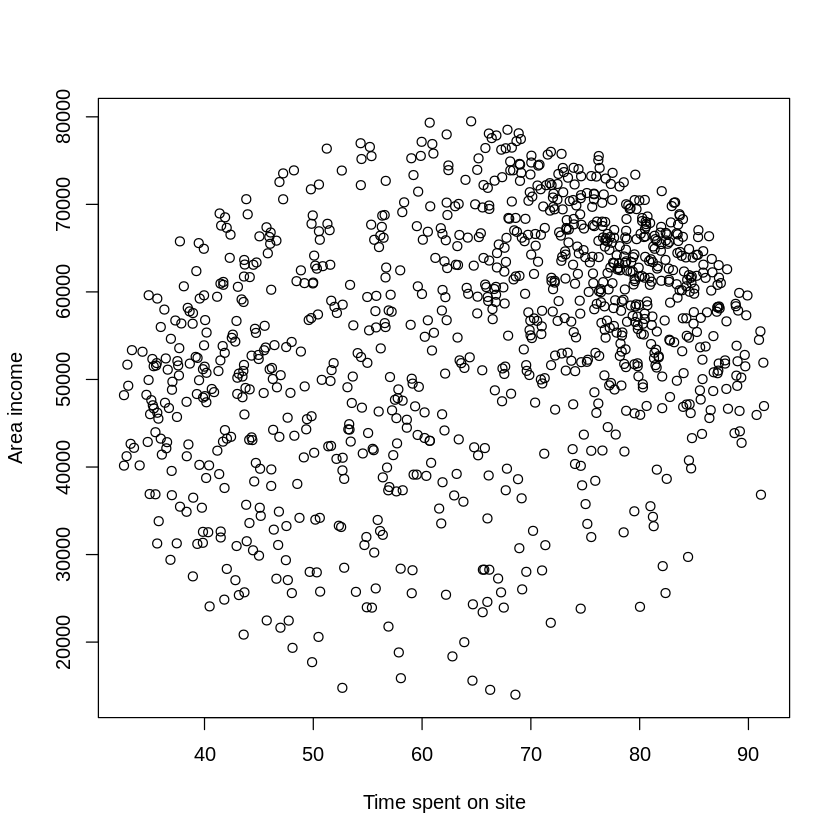

In [37]:
plot(site_time, income, xlab="Time spent on site", ylab="Area income")

# Implementing the solution

In [39]:
#Create a dataframe that selects those that clicked on an ad
yes <-  advertising %>% filter(advertising$clicked_on_ad  == 1);   # Select those  clicked on ad

In [40]:
# A summary of those that clicked
summary(yes)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:42.84            1st Qu.:34.00   1st Qu.:39107   1st Qu.:123.6       
 Median :51.53            Median :40.00   Median :49417   Median :138.8       
 Mean   :53.15            Mean   :40.33   Mean   :48614   Mean   :145.5       
 3rd Qu.:62.08            3rd Qu.:47.00   3rd Qu.:59241   3rd Qu.:161.2       
 Max.   :91.37            Max.   :61.00   Max.   :78521   Max.   :270.0       
 ad_topic_line          city                male         country         
 Length:500         Length:500         Min.   :0.000   Length:500        
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.462                     
                                       3rd Qu.:1.000                     
   

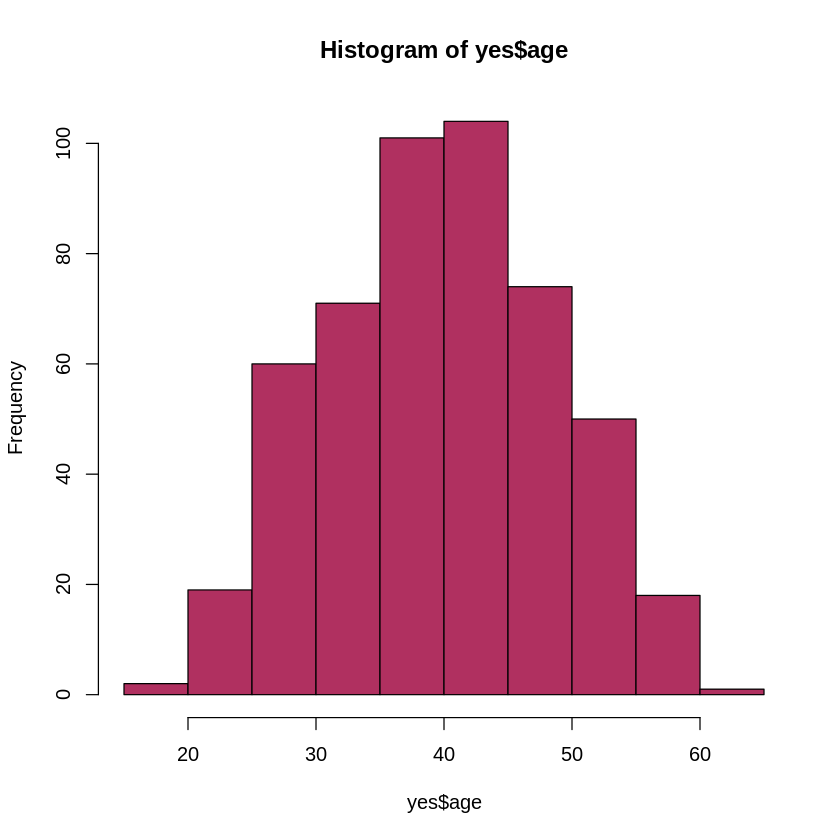

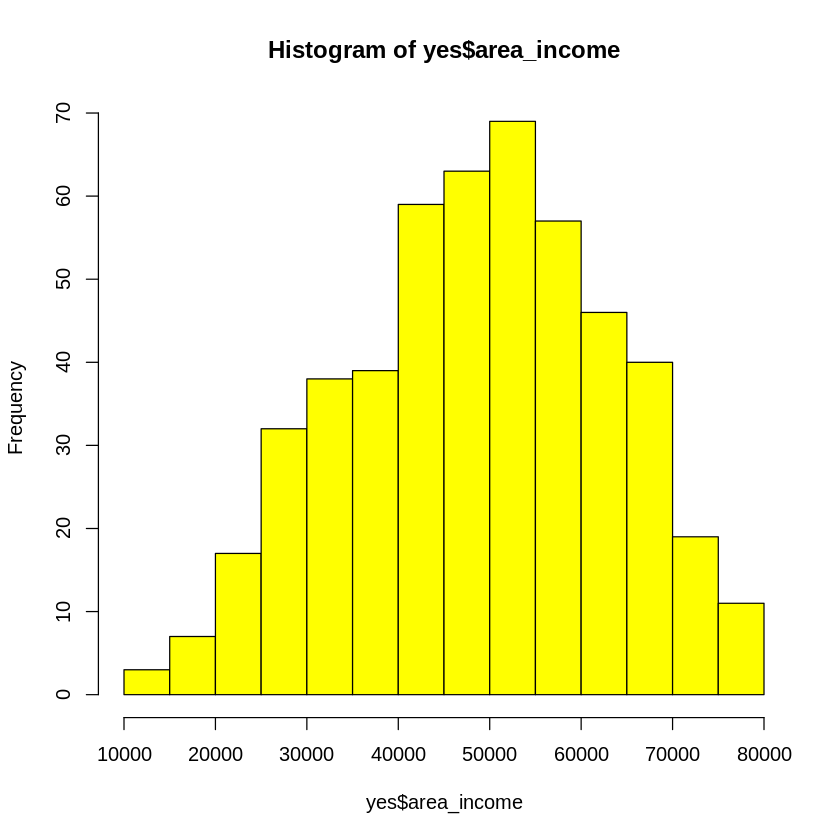

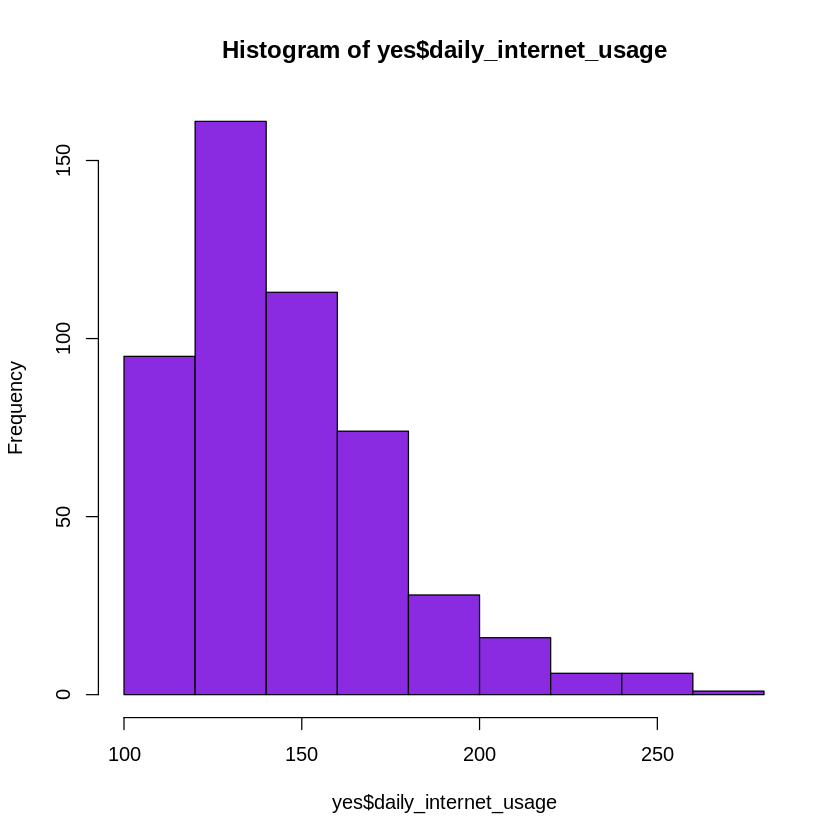

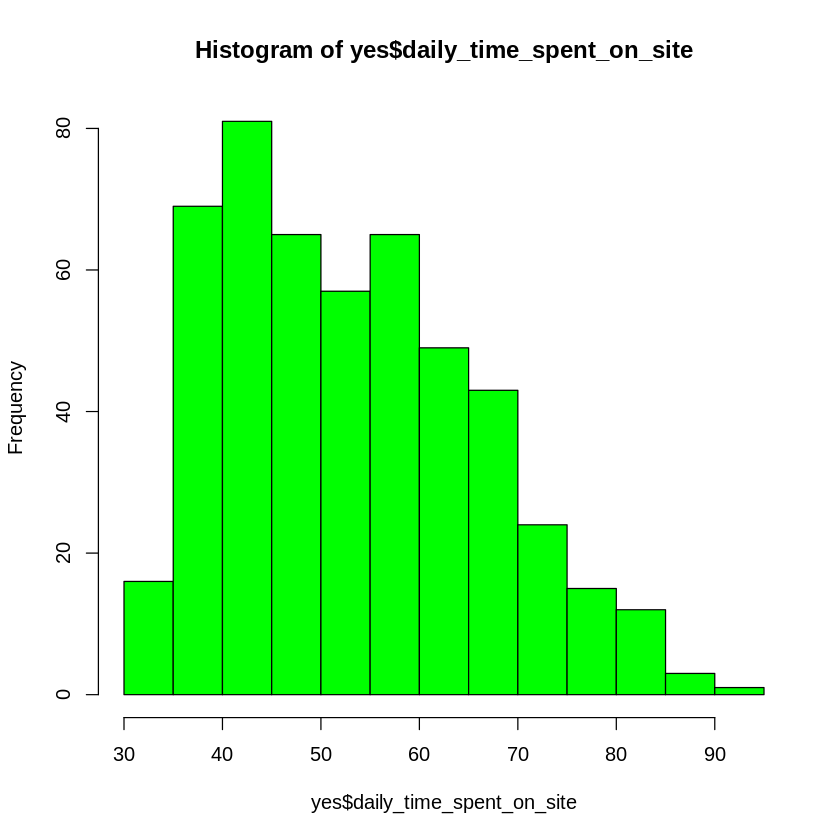

In [42]:
#See the various distributions

#Age distribution
hist(yes$age, col='maroon')

#See the area_incomedistribution 
hist(yes$area_income, col='yellow')

#See the daily_internet_usage distribution 
hist(yes$daily_internet_usage, col='blueviolet')

#daily_time_spent_on_site distribution 
hist(yes$daily_time_spent_on_site, col='green')

In [44]:
#Distribution of the countries 

countries <- table(yes$country)
countries


                                        Afghanistan 
                                                  5 
                                            Albania 
                                                  4 
                                            Algeria 
                                                  3 
                                     American Samoa 
                                                  3 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  1 
                                           Anguilla 
                                                  3 
       Antarctica (the territory South of 60 deg S) 
                                                  2 
                                Antigua and Barbuda 
                                                  4 
                                          Arg



> These are the countries that should be focused on.



# Recommendations



> It's recommended the client to focus on the ages between 30-45 since they had the most clicks. The area income of between 40000 to 60000 should also be considered. There's no difference in the time spent daily on the site as those who spent more or less still clicked on the ad.

